## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [2]:
visits_df = pd.read_csv('/datasets/visits_info_short.csv')
#visits_df = pd.read_csv('visits_info_short.csv')
orders_df = pd.read_csv('/datasets/orders_info_short.csv')
#orders_df = pd.read_csv('orders_info_short.csv')
costs_df = pd.read_csv('/datasets/costs_info_short.csv')
#costs_df = pd.read_csv('costs_info_short.csv')

Выведем первые 10 строк каждого датасета.

In [3]:
visits_df.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
orders_df.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [5]:
costs_df.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


Отобразим информацию по кажому датасету.

In [6]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Пустых ячеек нет. Необходимо названия столбцов привести к надлежащему виду, а столбцы, содержащие инормацию о дате и времени привести в соответствующий тип.

In [9]:
visits_df.columns = visits_df.columns.str.lower() # приводим названия столбцов к нижнему регистру
orders_df.columns = orders_df.columns.str.lower()
costs_df.columns = costs_df.columns.str.lower()

In [10]:
visits_df = visits_df.rename(columns={'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'})
orders_df = orders_df.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})

In [11]:
visits_df['session_start'] = pd.to_datetime(visits_df['session_start']) # приводим данные к формату datetimevisits_df['session_start'] = pd.to_datetime(df['date'])
visits_df['session_end'] = pd.to_datetime(visits_df['session_end'])
orders_df['event_dt'] = pd.to_datetime(orders_df['event_dt'])
costs_df['dt'] = pd.to_datetime(costs_df['dt']).dt.date 

In [12]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [13]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [14]:
costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Проверим количество явных дубликатов в каждой из таблиц.

In [15]:
print(visits_df.duplicated().sum()) # подсчёт явных дубликатов
print(orders_df.duplicated().sum())
print(costs_df.duplicated().sum())

0
0
0


Краткий вывод по текущему пункту:

* В таблицах отсутствуют пропуски
* Названия столбцов приведены к надлежащему виду
* Столбцы с информацией о дате и времени приведеты к типу datetime
* В таблицах отсутствуют дубликаты

## Определение функций для расчета и анализа LTV, ROI, удержания и конверсии

Определим функции для расчета требуемых параметров.

In [16]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs): #events, event_names=[]

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
#     for event in event_names:
#         if event in events['event_name'].unique():
#             profiles[event] = profiles['user_id'].isin(
#                 events.query('event_name == @event')['user_id'].unique()
#             )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

# def get_profiles(sessions, orders):

#     profiles = (
#         sessions.sort_values(by=['user_id', 'session_start'])
#         .groupby('user_id')
#         .agg(
#             {
#                 'session_start': 'first',
#                 'channel': 'first',
#                 'device': 'first',
#                 'region': 'first',
#             }
#         )
#         .rename(columns={'session_start': 'first_ts'})
#         .reset_index()
#     )

#     profiles['dt'] = profiles['first_ts'].dt.date
#     profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
#     # проверьте, есть ли ID пользователей из profiles в orders
#     profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

#     return profiles

In [17]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [18]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [19]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left' 
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [20]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [21]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [22]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [23]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

### Создание пользовательских профилей. Определение минимальной и максимальной даты привлечения пользователей

In [24]:
profiles = get_profiles(visits_df, orders_df, costs_df) # получаем профили пользователей
display(profiles.head(5)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [25]:
profiles['first_ts'].min() # минимальная дата привлечения пользователей (дата регистрации)

Timestamp('2019-05-01 00:00:41')

In [26]:
profiles['first_ts'].max() # максимальная дата привлечения пользователей

Timestamp('2019-10-27 23:59:04')

### География пользователей и на какую страну приходится больше всего платящих пользователей.

Расчитаем количество пользователей и долю платящих из каждой страны. 

In [27]:
profiles.groupby('region').agg({'user_id':'nunique', 'payer':'mean'}).sort_values(by='payer', ascending=False).style.format({'payer':'{:,.2%}'.format})

,user_id,payer
region,,
United States,100002,6.90%
Germany,14981,4.11%
UK,17575,3.98%
France,17450,3.80%


### Устройства клиентов и какие устройства предпочитают платящие пользователи

Расчитаем количество пользователей и долю платящих для каждого устройства.

In [28]:
profiles.groupby('device').agg({'user_id':'nunique','payer':'mean'}).sort_values(by='payer', ascending=False).style.format({'payer':'{:,.2%}'.format})

,user_id,payer
device,,
Mac,30042,6.36%
iPhone,54479,6.21%
Android,35032,5.85%
PC,30455,5.05%


### Рекламные источники привлечения клиентов

Расчитаем количество пользователей и долю платящих для каждого канала привлечения.

In [29]:
profiles.groupby('channel').agg({'user_id':'nunique','payer':'mean'}).sort_values(by='payer', ascending=False).style.format({'payer':'{:,.2%}'.format})

,user_id,payer
channel,,
FaceBoom,29144,12.20%
AdNonSense,3880,11.34%
lambdaMediaAds,2149,10.47%
TipTop,19561,9.60%
RocketSuperAds,4448,7.91%
WahooNetBanner,8553,5.30%
YRabbit,4312,3.83%
MediaTornado,4364,3.57%
LeapBob,8553,3.06%


Краткий вывод по текущему пункту:

В исходной таблице отображены данные привлечения клиентов с 10 мая 2019 года по 27 октября 2019 года.
Больше всего платящих покупателей из  США, затем идут клиенты из Германии, Великобритании и Франции.
Наибольшее количество платящих клиентов используют Mac, следом идут пользователи iPhone, Android и PC.
Источник FaceBoom оказался наиболее привлекательным для новых пользователей. Затем идут AdNonSense, lambdaMediaAds, TipTop и другие. Наимееньшее количество клиентов пришло из источника organic.

## Маркетинг

### Расчет общей суммы расходов на маркетинг

In [30]:
sum_costs = costs_df['costs'].sum()
print('Общая сумма расходов на маркетинг:', sum_costs)

Общая сумма расходов на маркетинг: 105497.30000000002


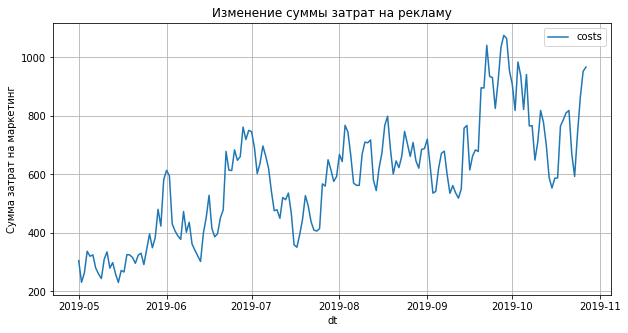

In [31]:
costs_df.groupby('dt').agg({'costs':'sum'}).plot(
    grid=True, figsize=(10,5), title='Изменение суммы затрат на рекламу',
    ylabel='Сумма затрат на маркетинг'
)

plt.show()

In [34]:
cst = costs_df.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)

In [35]:
cst['part_costs']= cst['costs']/sum_costs

In [36]:
#cst['part'] = cst.style.format('{:,.2%}', subset='part_costs')
cst.style.format({'part_costs':'{:,.2%}'.format})

,costs,part_costs
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


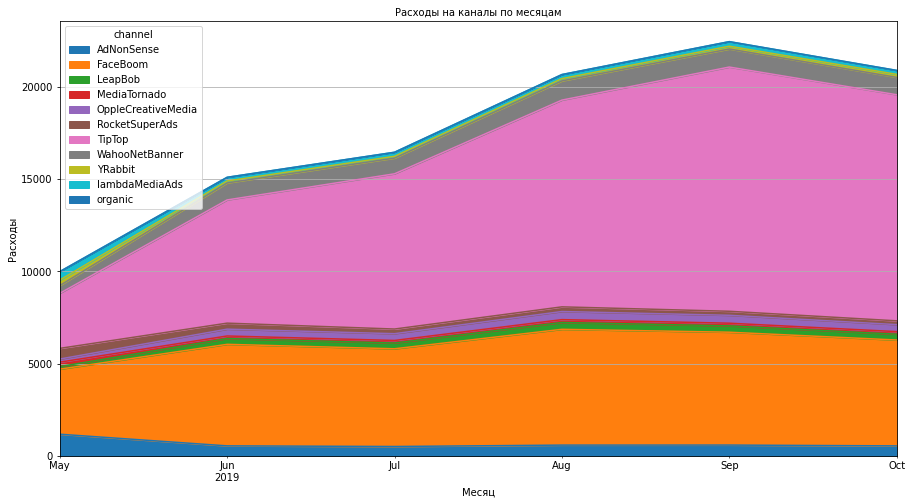

In [81]:
profiles.pivot_table(index='month', columns='channel', values='acquisition_cost', aggfunc='sum').plot.area(grid=True, figsize=(15,8))
plt.title("Расходы на каналы по месяцам", fontsize=10)
plt.xlabel("Месяц", fontsize=10)
plt.ylabel("Расходы", fontsize=10)
plt.show()

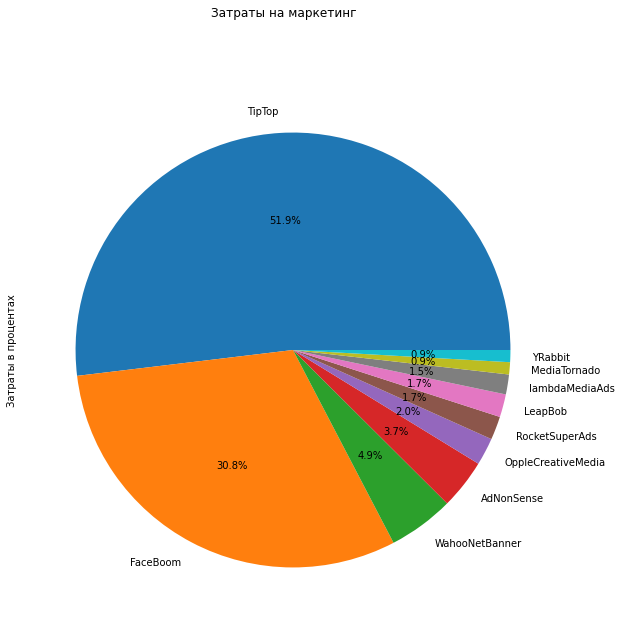

In [39]:
costs_df.groupby(['channel']).agg({'costs':'sum'}).\
sort_values(by='costs', ascending=False).plot(kind='pie', figsize=(10,10), subplots=True, \
            legend=False,autopct='%1.1f%%', title='Затраты на маркетинг', ylabel='Затраты в процентах')

plt.show()

За рассматриваемый период больше всего денег было выплачено источнику TipTop. Затем идут FaceBoom, WahooNetBanner, AdNonSense и другие. 

### Расчет стоимости привлечения одного пользователя из каждого источника.

Расчитаем среднюю стоимость привлечения пользователей по источникам привлечения.

In [40]:
profiles.query('channel!="organic"').groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [41]:
print('Средняя стоимость привлечения клиентов для всего проекта: ', round(profiles.query('channel!="organic"')['acquisition_cost'].mean(),2))

Средняя стоимость привлечения клиентов для всего проекта:  1.13


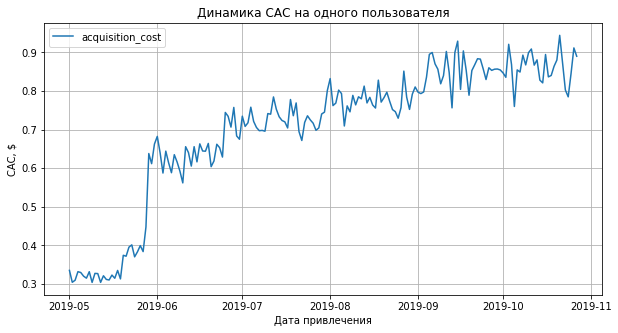

In [42]:
# строим график истории изменений CAC

profiles.pivot_table(
    index='dt', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС на одного пользователя')
plt.show()

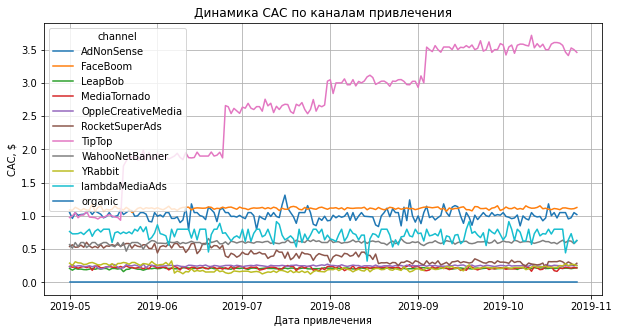

In [43]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

По графику видно, что для источника TipTop расходы на рекламу растут примерно каждый месяц. Для других источников расходы более-менее стабильны на протяжении всего рассматриваемого периода.

Краткий вывод по текущему пункту:

* За рассмотренный период было потрачено 105497.3 долларов в сумме на рекламу.
* Расходы на рекламу примерно каждый месяц только растут.
* За рассматриваемый период больше всего денег было выплачено источнику TipTop. Затем идут FaceBoom, WahooNetBanner, AdNonSense и другие. Для канала TipTop стоимость привлечения одного клиента вырасла с 1 доллара до 3.5 за рассматриваемый период. Стоимость привлечения одного клиента для других источников примерно одинакова на протяжении всего исследуемого периода.
* Средняя стоимость привлечения клиентов для всего проекта: 1.13. Стоимость привлечения клиента через канал TipTop почти в 2 раза больше этой ценны и составляет 2.8 доллара.

## Оценка окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [44]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

### Анализ общей окупаемости рекламы

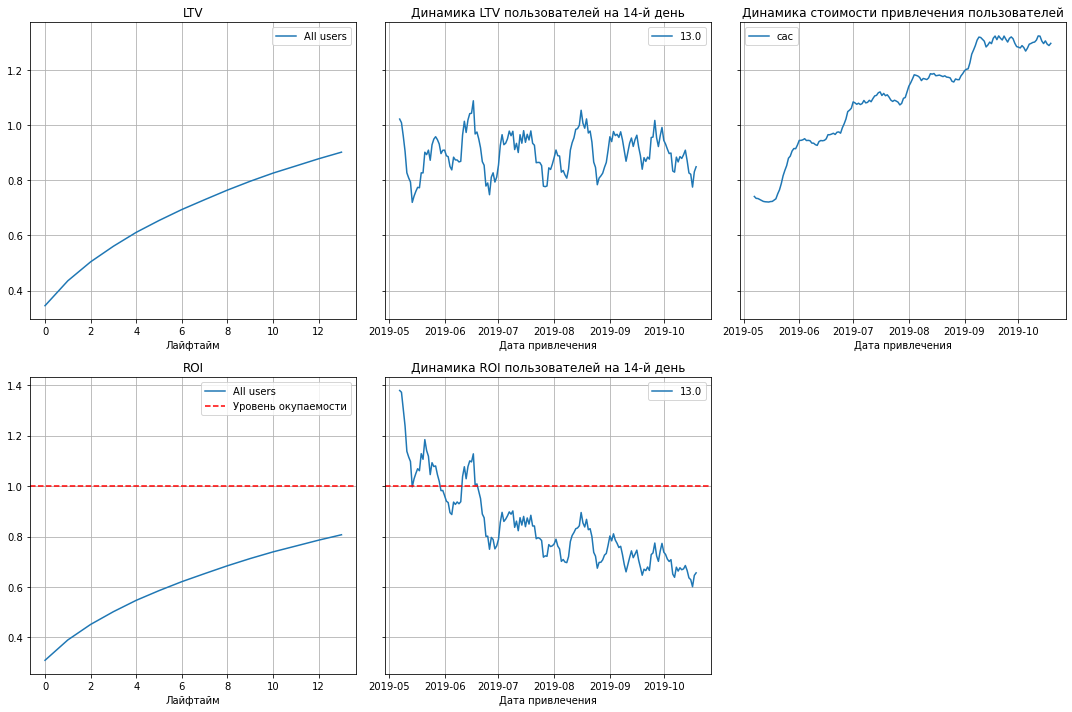

In [45]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel!="organic"'), orders_df, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

#### По графикам можно сделать такие выводы:

   * Реклама не окупается. ROI в конце четырнадцатидневного периода около 80%, это довольно низкий показатель.
   * CAC не стабилен. Рекламный бюджет растет.
   * LTV растет, график выглядит нормально.
   * Заметно снижении динамики ROI на 14 день.

### Анализ окупаемости рекламы с разбивкой по устройствам

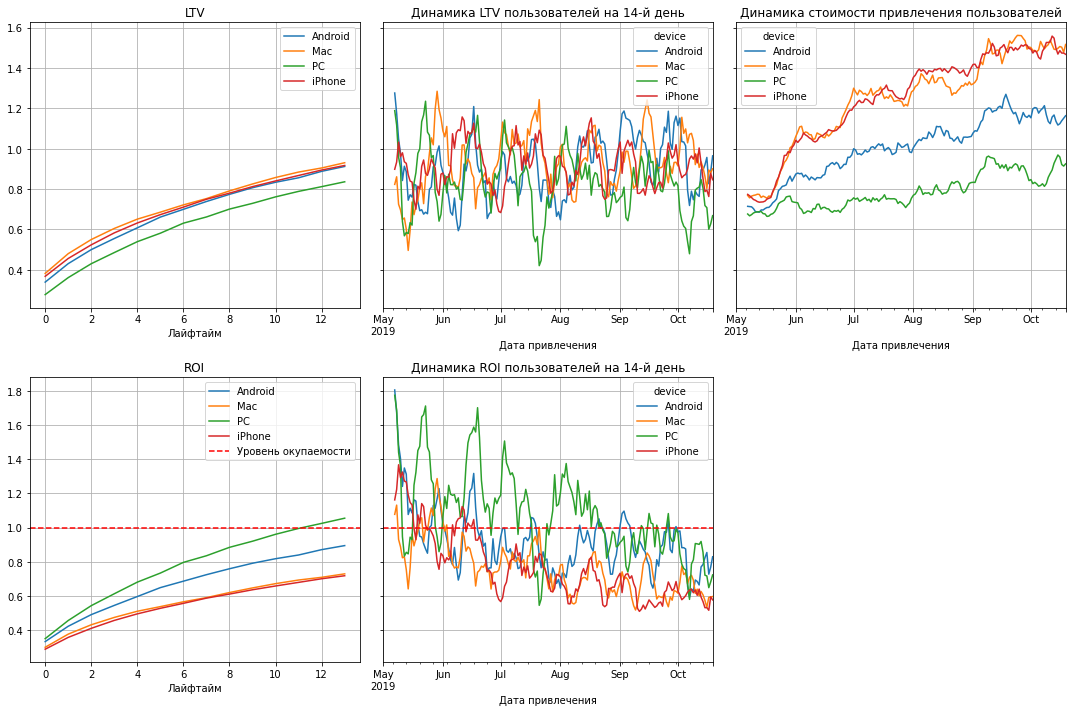

In [46]:
# считаем LTV и ROI с разбивкой по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel!="organic"'), orders_df, observation_date, horizon_days, dimensions = ['device']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)
#plt.figure(figsize=(10,10))
plt.show()

По графикам можно сделать такие выводы:

* Реклама окупается для пользователей PC. А для пользователей Android, MaC и iPhone стабильно не окупается.
* ROI 14-го дня для всех устройств значительно ниже 100%.
* Уровень САС повышается.

### Анализ окупаемости рекламы с разбивкой по странам

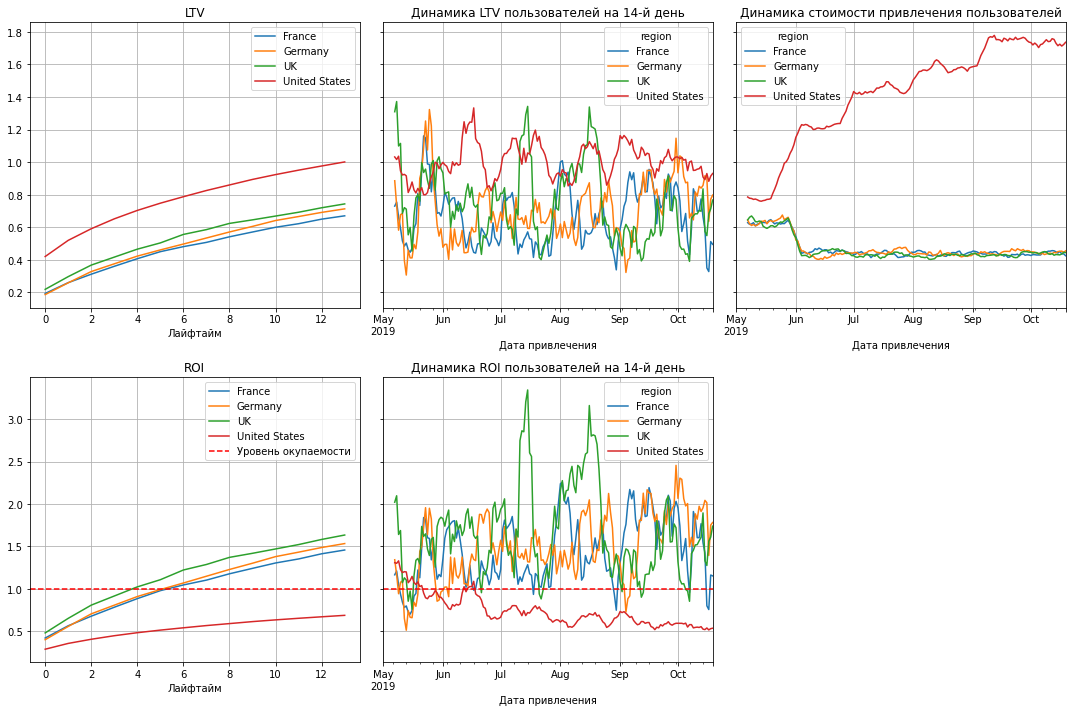

In [47]:
# считаем LTV и ROI с разбивкой по странам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel!="organic"'), orders_df, observation_date, horizon_days, dimensions = ['region']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:

* Реклама окупается во Франции, Германии и Великобритании, а в США уровень ROI примерно 80-90%.
* для США растет стоимость привлечения рекламы, но окупаемость для этой страны продолжает падать. Для других стран стоимость привлечения пользователей стабильна.
* LTV довольно стабилен. Данный показатель для США выше, чем для других стран.
* Явное снижение динамики ROI на 14 день только в США. Для других стран данный показатель стабилен.

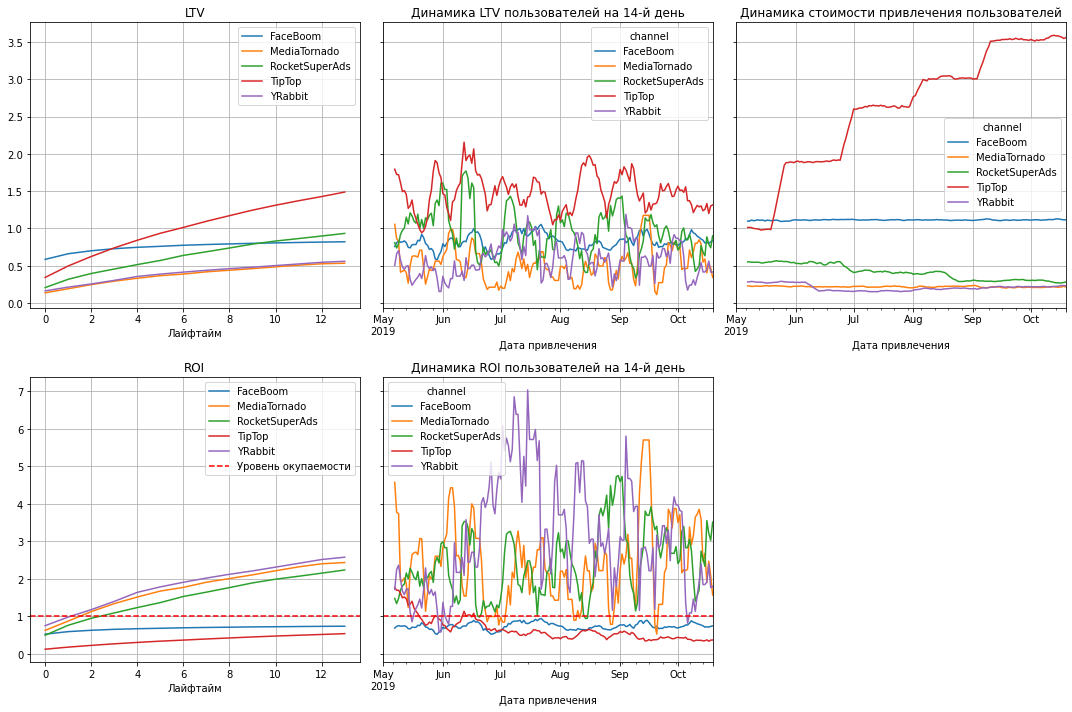

In [48]:
# считаем LTV и ROI с разбивкой по рекламным каналам для США
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region == "United States" & channel!="organic"'), orders_df, observation_date, horizon_days, dimensions = ['channel']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


Из графиков, построенных только для США, видно, что стоимость привлечения для канала TipTop только растет. Для RocketSuperAds даже немного падает. для других каналов стоимость привлечения стабильна.
Для каналов TipTop и FaceBoom новые клиенты не окупаются. Для других каналов значение ROI примерно в два раза выше уровня окупаемости.
Для FaceBoom уровень LTV практически стабилен, что говорит, что пользователи, привлеченные этим каналом практически не увеличивают своих трат в рассматриваемый период.
Для TipTop уровень LTV отображает максимальное изменение, по сравнению с другими графиками. Что показывает, что эти клиенты довольно прибыльные.

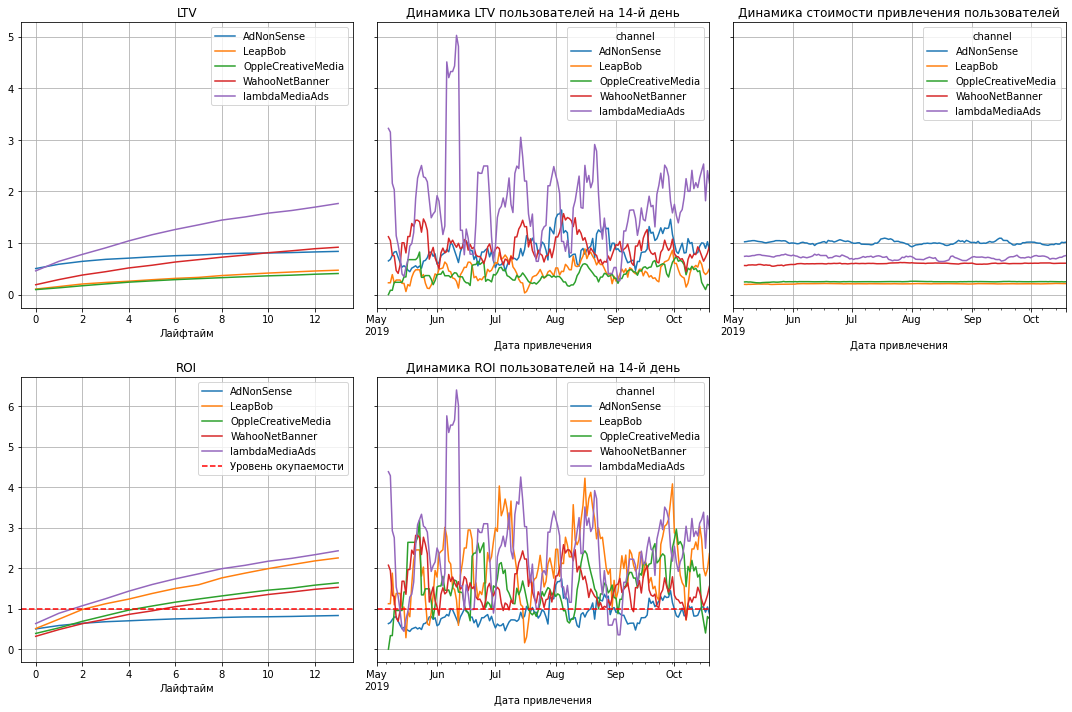

In [49]:
# считаем LTV и ROI с разбивкой по рекламным каналам для Европы
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region != "United States" & channel!="organic"'), orders_df, observation_date, horizon_days, dimensions = ['channel']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Для европейской аудитории канал AdNonSense не окупается. Значение ROI на уровне 80-90% к концу расчетного периода.
lambdaMediaAds и LeapBob показывают наибольшее значение LTV. Для AdNonSense данный показатель практически не изменяется.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

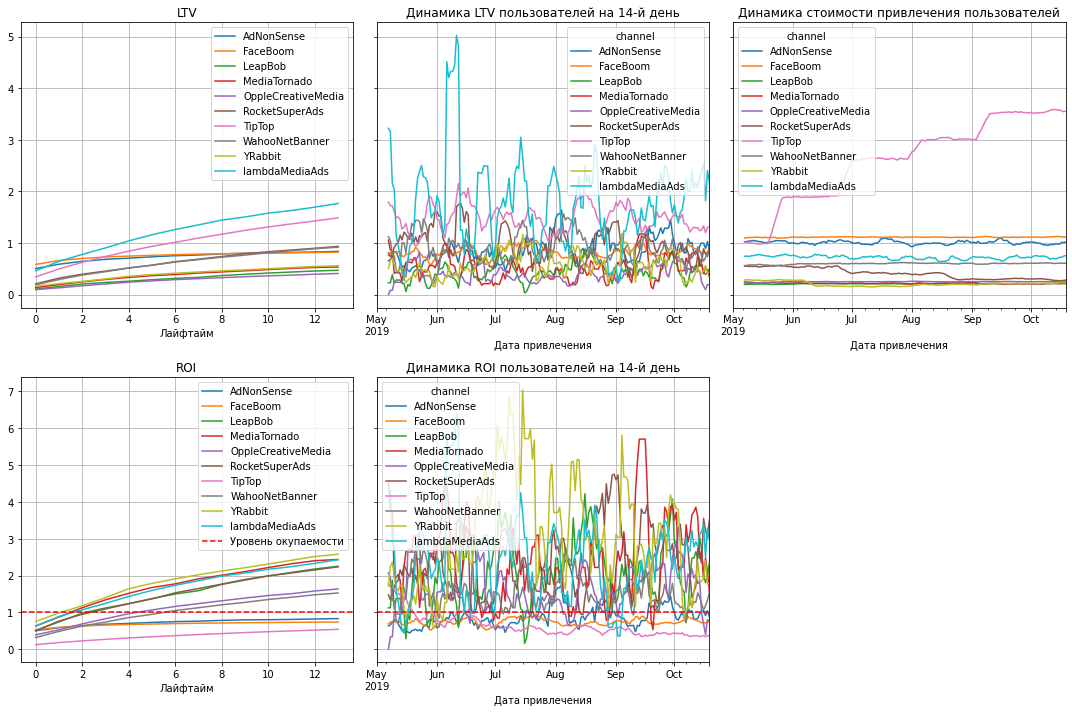

In [50]:
# считаем LTV и ROI с разбивкой по рекламным каналам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel!="organic"'), orders_df, observation_date, horizon_days, dimensions = ['channel']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)
#plt.figure(figsize=(50,30))
#plt.show()

Реклама окупается для всех каналов кроме TipTop, FaceBoom, AdNonSense. Причем расходы на рекламу в этих трех каналах самые высокие. Динамика ROI на 14 день находится ниже уровня окупаемости для TipTop, FaceBoom, а для AdNonSense оказывается ниже уровня 100% в конце периода исследования.
Для FaceBoom и AdNonSense уровень LTV практически стабилен, что говорит, что пользователи, привлеченные этим каналом практически не увеличивают своих трат в рассматриваемый период.
Для lambdaMediaAds и TipTop уровень LTV отображает максимальное изменение, по сравнению с другими графиками. Что показывает, что эти клиенты довольно прибыльные.

Краткий вывод по текущему пункту:

* На общем графике реклама не окупается. ROI в конце четырнадцатидневного периода близок к 100%, но всё же не пересекает уровень окупаемости. CAC не стабилен. Рекламный бюджет растет. Заметно снижении динамики ROI на 14 день.
* На графиках с разбивкой по устройствам реклама окупается для пользователей PC. А для пользователей Android, MaC и iPhone стабильно не окупается. ROI 14-го дня для всех устройств снижается, для MaC и iPhone значительно ниже 100%. Уровень САС повышается для всех типов устройств.
* На графиках с разбивкой по странам реклама окупается во Франции, Германии и Великобритании, а в США уровень ROI примерно 80-90%. Для США растет стоимость привлечения рекламы, но окупаемость для этой страны продолжает падать. Для других стран стоимость привлечения пользователей стабильна. LTV довольно стабилен. Явное снижение динамики ROI на 14 день только в США. Для других стран данный показатель стабилен.
* На графиках с разбивкой по рекламным каналам видно, что реклама окупается для всех каналов кроме TipTop, FaceBoom, AdNonSense. Причем расходы на рекламу в этих трех каналах самые высокие. Динамика ROI на 14 день находится ниже уровня окупаемости для TipTop, FaceBoom, а для AdNonSense оказывается ниже уровня 100% в конце периода исследования.

Проанализируем конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам

### Анализ конверсии и удержания с разбивкой по устройствам.

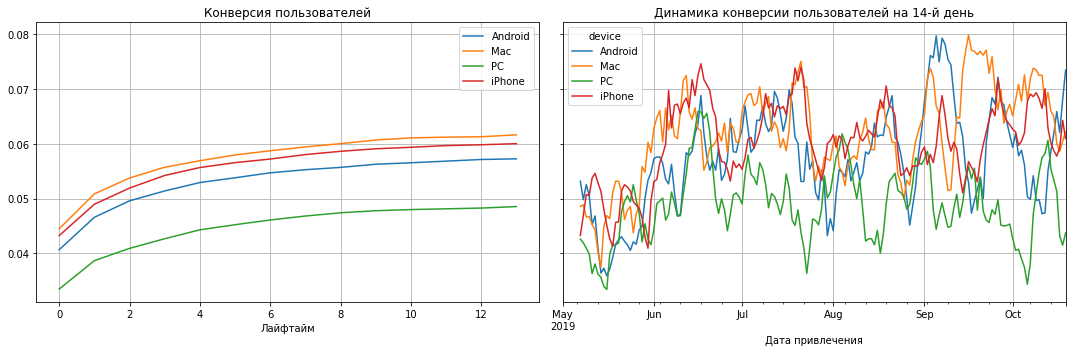

In [51]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders_df, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи iPhone и MaC конвертируются очень хорошо. Видимо, дело в удержании. Пользователи PC конвертируются хуже всего.

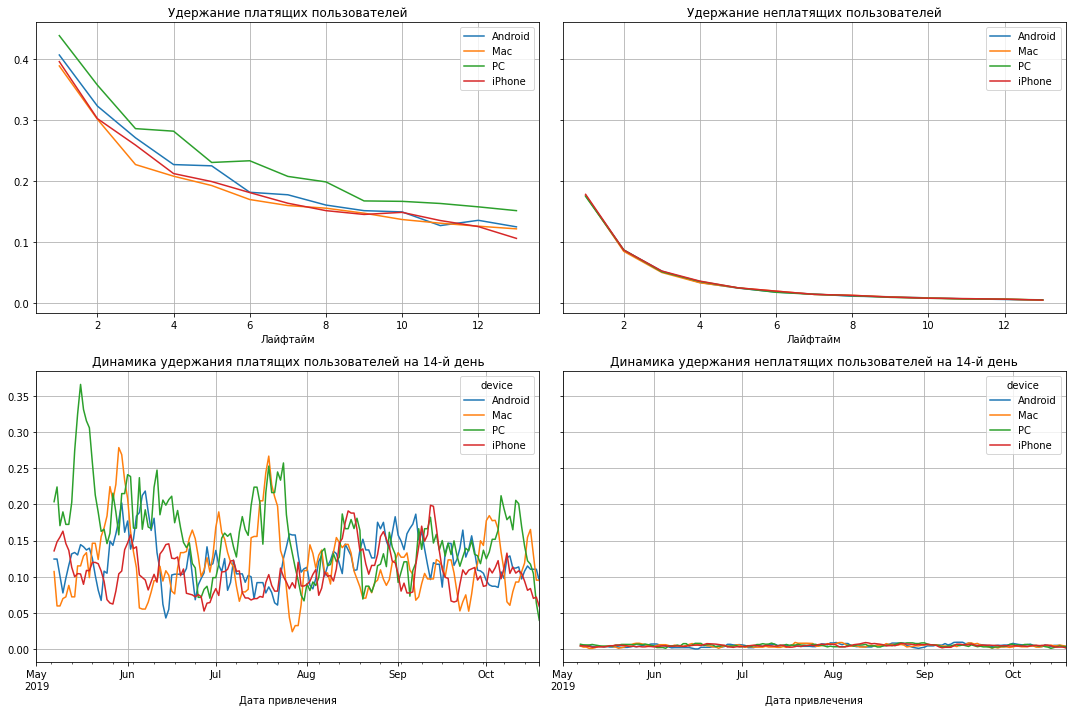

In [52]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits_df, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Платящие пользователи PC удерживаются несколько лучше, чем другие пользователи.
Для платящих пользователей на iPhone и MaC удержание 14й день не ниже, чем на остальных устройствах. 
Скорее всего, причина в какой-нибудь технической проблеме.

Неплатящие пользователи всех типов устройств одинакого плохо удерживаются.


### Анализ конверсии и удержания с разбивкой по странам.

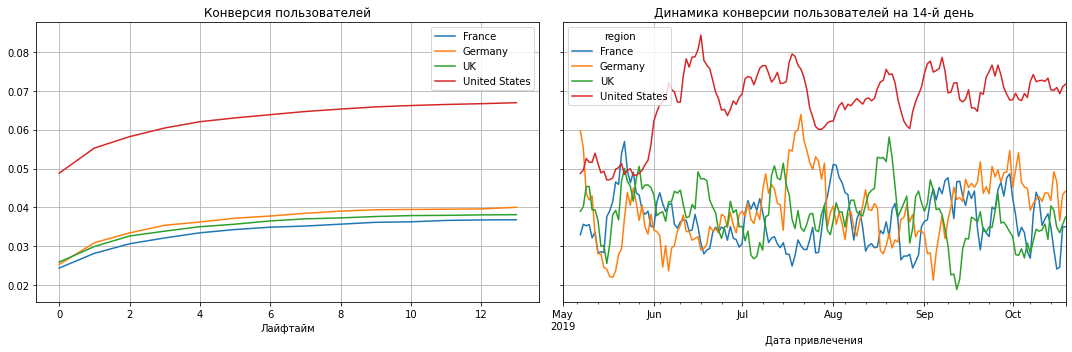

In [53]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders_df, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей из США стабильно выше конверсии клиентов из других стран.

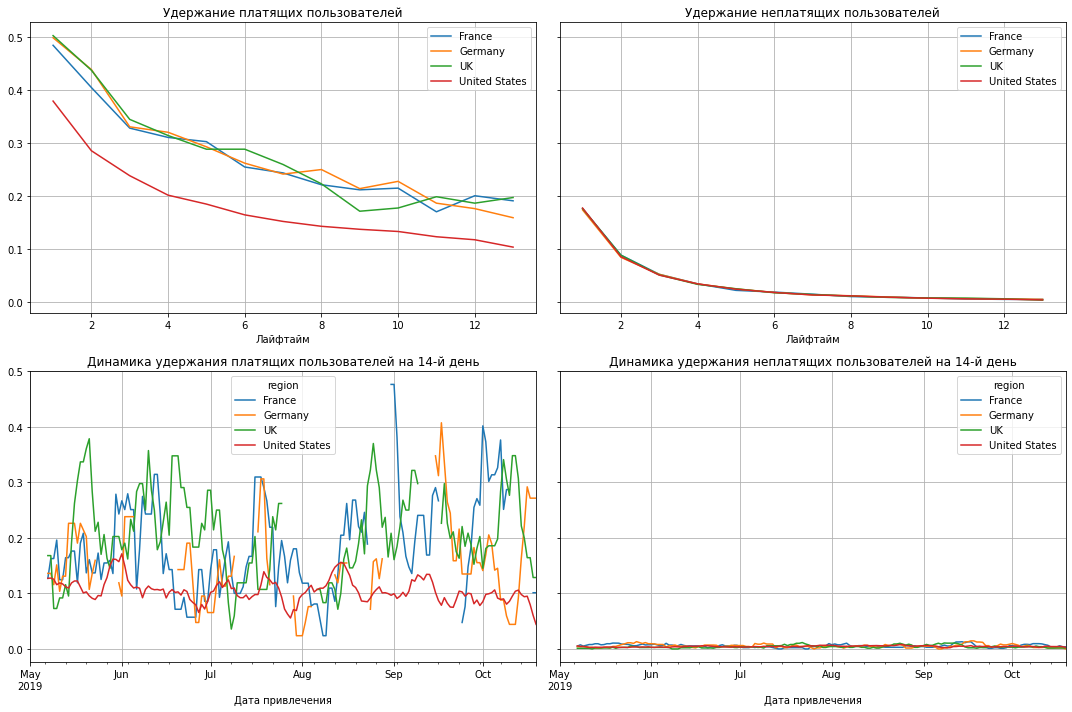

In [54]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits_df, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Клиенты из США стабильно плохо удерживаются. Для платящих пользователей из США удержание 14-го дня ниже, чем для клиентов из других стран. 

### Анализ конверсии и удержания с разбивкой по рекламным каналам.

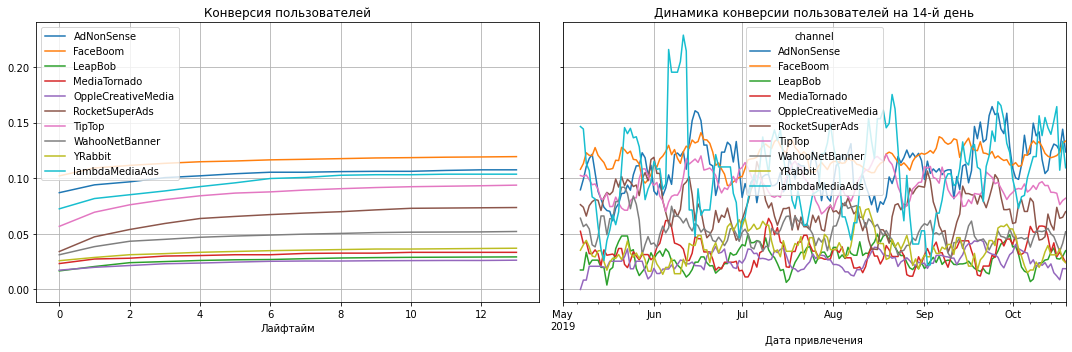

In [55]:
# смотрим конверсию с разбивкой по рекламным каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel!="organic"'), orders_df, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По графикам видно, что для всех предстваленных каналов уровень конверсии стабильно растет.

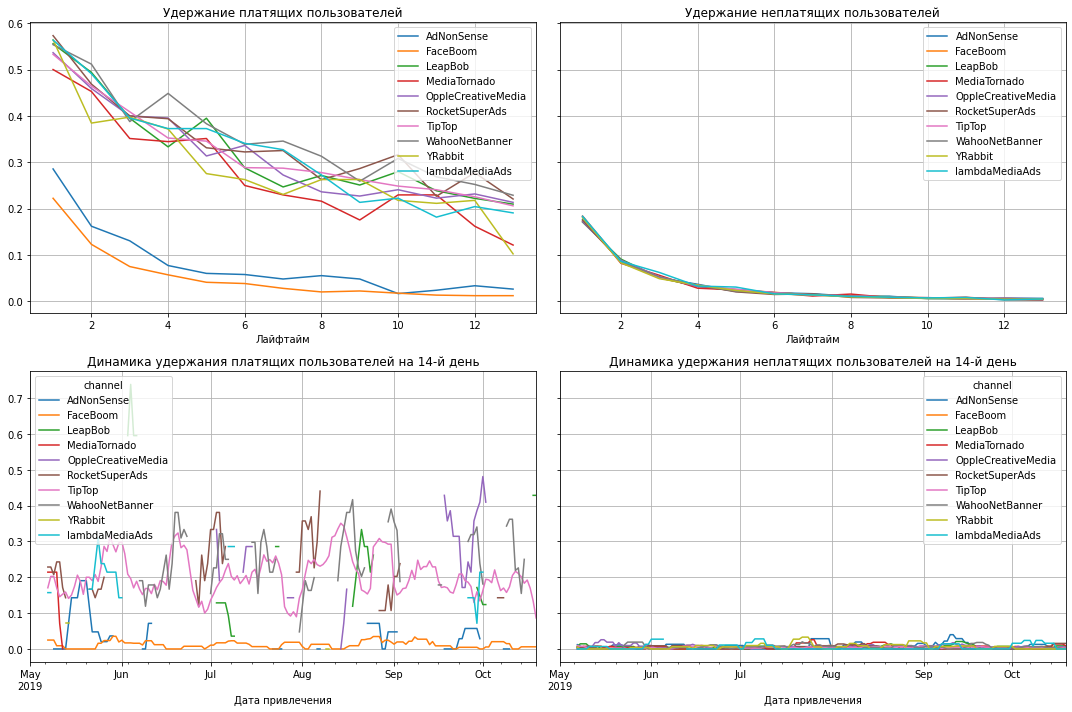

In [56]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel!="organic"'), visits_df, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 


Для каналов FaceBoom и AdNonSense график удержания располагается намного ниже уровня других каналов. Возможно пользователи сталкиваются к какими-то техническими проблемами при переходе с рекламного канала на целевой сайт. Неплатящие пользователи удерживаются плохо.

Краткий вывод по текущему пункту:
* По графикам конверсии видно, что все пользователи, не зависимо от критерия разбивки, конвертируются хорошо.
* По графикам удержания выявлены некоторые проблемы: 
1. Пользователи из США удерживаютс хуже, чем пользователи других стран.
2. Пользователи всех устройств удерживаются примерно одинаково.
3. Для канала FaceBoom график удержания располагается намного ниже уровня других каналов, причем конверсия для данного канала максимальная.

## Выводы

Причины неэффективности привлечения пользователей:
* Для пользователей MaC и iPhone реклама стабильно не окупается.
* Для США растет стоимость привлечения рекламы, но окупаемость для этой страны снижается.
* Для каналов рекламы TipTop, FaceBoom, AdNonSense стоимость не окупается. Причем расходы на рекламу в этих трех каналах одни из самых высоких.

Рекомендации:
* Проверить приложение для пользователей MaC и iPhone на наличие ошибок работы.
* Для пользователей из США проверить работу приложения, возможно есть какие-то законодательные или прочие ограничения, технические ошибки для пользователей из этой страны.
* Выяснить точную причину, почему пользователи, привлеченные каналами TipTop, FaceBoom, AdNonSense, не окупаются. На эти канала приходятся максимальные рекламные расходы. Возможно есть технические проблемы при переходе с рекламного канала на целевой сайт.

Для FaceBoom уровень LTV практически стабилен, что говорит, что пользователи, привлеченные этим каналом практически не увеличивают своих трат в рассматриваемый период.
Для каналов FaceBoom и AdNonSense удержание клиентов намного ниже уровня других каналов.

* Среди остальных рекламных каналов хорошие показатели у каналов lambdaMediaAds и RocketSuperAds. Показатель LTV одни из самых высоких для этих каналов, окупаемость рекламы примерно в 2-2.5 раза выше уровня окупаемости. Конверсия и удержание платящих пользователей на довольно высоком уровне.
* Для США стоит обратить внимание на другие рекламные каналы, как RocketSuperAds, YRabbit и MediaTornado.
* Для Европы стоит обратить внимание на другие рекламные каналы, такие как lambdaMediaAds и WahooNetBanner.
